Simple Linear Regression

Do to list:
1.Read the dataset
2.perform EDA and feature engineering
3.divide our dataset into independent and dependent features
4.Further decide the dataset into train and test
5.Standard scalling on the train and test data
6.Model Training

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
os.chdir(r'C:\Users\PRATHMESH\OneDrive\Desktop\3ri\credit card')

In [3]:
df=pd.read_csv('new height and weight.csv')
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


Text(0, 0.5, 'Height')

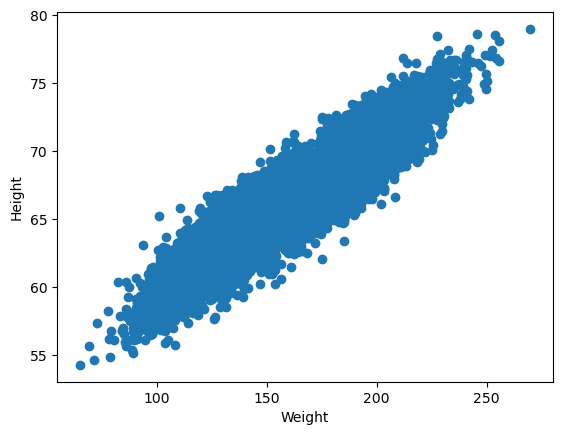

In [4]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

step 2 EDA,FE 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  10000 non-null  float64
 1   Weight  10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


In [6]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989698


In [7]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

Step 3 Divide our dataset into independent and dependent feature

In [8]:
x=df[['Weight']] #independent feature
y=df[['Height']]  #dependent feature

In [9]:
x.shape,y.shape

((10000, 1), (10000, 1))

Step 4 Further dicide the dataset into train and test

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [12]:
x_train.shape,x_test.shape

((8000, 1), (2000, 1))

In [13]:
y_train.shape,y_test.shape

((8000, 1), (2000, 1))

step 5 Standard Scaling on the tarin test data

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler=StandardScaler()

In [16]:
x_train=scaler.fit_transform(x_train)

In [17]:
x_test=scaler.transform(x_test)

Step 6 Model Training 

In [18]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip show scikit-learn

Name: scikit-learnNote: you may need to restart the kernel to use updated packages.

Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\PRATHMESH\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: daal4py, imbalanced-learn, scikit-learn-intelex


In [20]:
pip list | grep scikit-learn

scikit-learn                  1.3.2
scikit-learn-intelex          20230426.121932
Note: you may need to restart the kernel to use updated packages.


Model Training

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
regressor=LinearRegression()

Training the train data

In [23]:
regressor.fit(x_train,y_train)

LinearRegression()

In [24]:
regressor.intercept_

array([66.35968141])

In [25]:
regressor.coef_

array([[3.55479288]])

Text(0, 0.5, 'Height')

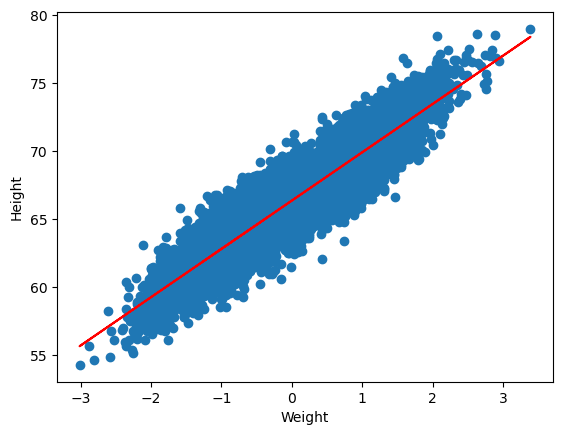

In [26]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),'r')
plt.xlabel('Weight')
plt.ylabel('Height')

Prediction of train data
1.Predicted height output = intercept + coef_('Weights')
2.y_pred_train =66.35968141 + 3.55479288(x_train)

prediction of test data
1.predicted height output= intercept+coef_(weights)
2.Y_pred_test =66.35968141 + 3.55479288(x_test)

Prediction for test data

In [27]:
y_pred_test=regressor.predict(x_test)

In [28]:
y_pred_test

array([[67.66759668],
       [70.11347651],
       [67.34604312],
       ...,
       [62.34937415],
       [69.27157848],
       [59.829821  ]])

In [29]:
y_test

,Height
6252,68.687232
4684,68.829334
1731,66.398128
4742,71.929340
4521,67.042903
...,...
6412,65.748601
8285,60.731857
7853,62.188933
1095,67.068304


Performance Metrices MAE,MSE,RMSE

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [31]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2.1123619489886463
1.158865633208018
1.453396693607305


Accuracy of Model R square and Adjusted r squared

In [32]:
from sklearn.metrics import r2_score

In [33]:
score=r2_score(y_test,y_pred_test)
score

0.857812023053422

Adjusted r Square

In [34]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.857740857899795

In [35]:
scaler

StandardScaler()

In [36]:
regressor

LinearRegression()